## 调参过程 发现 n_estimators = 70 效果最好

mean_squared_error: 0.021167794248658774
score: 0.9792709931042887
time used 0 s
--------------n_estimators=20------done---------------
mean_squared_error: 0.021434761624916733
score: 0.9790150458646837
time used 0 s
--------------n_estimators=30------done---------------
mean_squared_error: 0.02104546733031643
score: 0.979388315208584
time used 0 s
--------------n_estimators=40------done---------------
mean_squared_error: 0.01997257585768881
score: 0.9804185168009111
time used 0 s
--------------n_estimators=50------done---------------
mean_squared_error: 0.020059550529242628
score: 0.980334922094661
time used 0 s
--------------n_estimators=60------done---------------
mean_squared_error: 0.019264161154720558
score: 0.9810999327859263
time used 0 s
--------------n_estimators=70------done---------------
mean_squared_error: 0.019365792813375124
score: 0.9810021162668929
time used 1 s
--------------n_estimators=80------done---------------
mean_squared_error: 0.0193578212362632
score: 0.9810

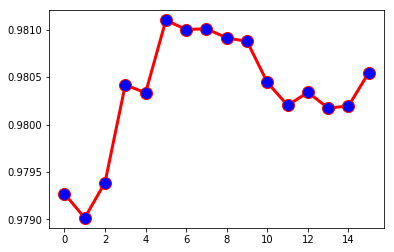

In [2]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
import time
import matplotlib.pyplot as plt

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )


# clf = RandomForestClassifier(n_estimators= 10 ,
#                                  random_state=0,
#                                  max_depth=None,
#                                  max_features=sqrt)
scores = []
# for nt in [10, 20, 40, 80, 120, 160, 200, 300, 400, 500, 600, 700, 800]:
for nt in [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200]:
    t1 = time.time()
    forest = RandomForestRegressor(n_estimators=nt, random_state=123, max_features='sqrt',max_depth=None)
    forest.fit(X_train, y_train)
    pred = forest.predict(X_test)    
    print ("mean_squared_error:",mean_squared_error(y_test, pred))
    rmse = mean_squared_error(y_test, pred)
    score = np.divide(1,1+rmse)
    scores.append(score)
    print("score:",score)
    t2 = time.time() 
    print('time used %d s' % (t2-t1))
    print("--------------n_estimators=%d------done---------------"% nt)
print('everything has done')

x1 = np.arange(16) 
y1 = scores
plt.plot(x1,y1,label='Frist line',linewidth=3,color='r',marker='o', 
markerfacecolor='blue',markersize=12) 
# plt.plot(x2,y2,label='second line') 
# plt.xlabel('Plot Number') 
# plt.ylabel('Important var') 
# plt.title('Interesting Graph\nCheck it out') 
# plt.legend() 
plt.show() 
